## PCA, Iris
___

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

r_seed = 2022

In [5]:
iris = pd.read_csv('./datasets/Iris.csv')

In [7]:
iris.shape

(150, 6)

In [8]:
df = iris.drop(['Id'], axis = 1)

In [9]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


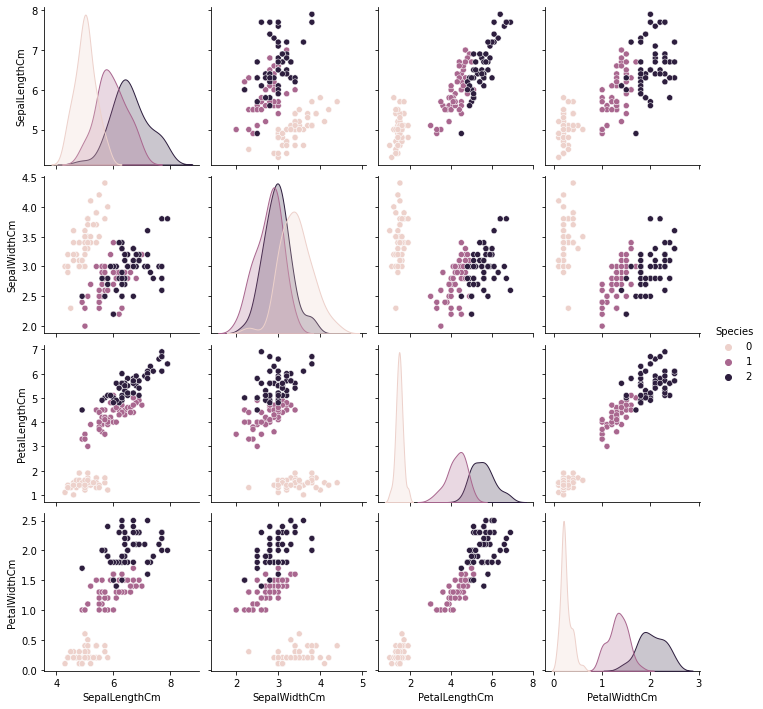

In [14]:
sns.pairplot(df, hue='Species')

In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [16]:
X.shape, y.shape

((150, 4), (150,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = r_seed)

In [19]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [20]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

X_train[:5]

array([[-1.71687346, -0.14275618, -1.37660609, -1.28770011],
       [-0.00509458, -0.82798585,  0.12043504,  0.02404873],
       [-0.37190434, -1.28480563,  0.17801354,  0.15522361],
       [-1.10552386, -0.14275618, -1.31902758, -1.28770011],
       [ 0.72852494, -0.37116607,  0.35074906,  0.15522361]])

In [22]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_train_pca

array([[-2.39211047, -0.87245821],
       [ 0.29422853, -0.76451723],
       [ 0.32820357, -1.31598883],
       [-2.03926849, -0.64173573],
       [ 0.76831266, -0.05569783],
       [-2.39161211,  0.07282594],
       [-2.13903783, -0.43844084],
       [ 0.20962822, -1.28709861],
       [-2.0654977 ,  1.15830736],
       [ 0.05996191, -1.02412994],
       [ 1.59619631,  0.26431492],
       [ 0.41451434, -0.1952625 ],
       [-0.45413264, -1.83190427],
       [ 2.38553618,  0.41062348],
       [ 1.9343411 ,  0.66892331],
       [ 1.6651431 ,  1.05194002],
       [ 2.28839518,  0.55250659],
       [ 2.12498803,  0.89820336],
       [-2.25617114, -0.5682472 ],
       [ 1.03054666, -0.02908006],
       [ 0.72878794, -0.22219153],
       [ 1.45979899,  0.99654587],
       [ 2.09702186,  0.60282698],
       [ 1.9328864 , -0.18520303],
       [-2.71770001,  0.48461903],
       [ 1.18359421,  0.86421357],
       [ 0.28677882, -0.28734399],
       [-2.27398044,  1.14791644],
       [ 0.53500238,

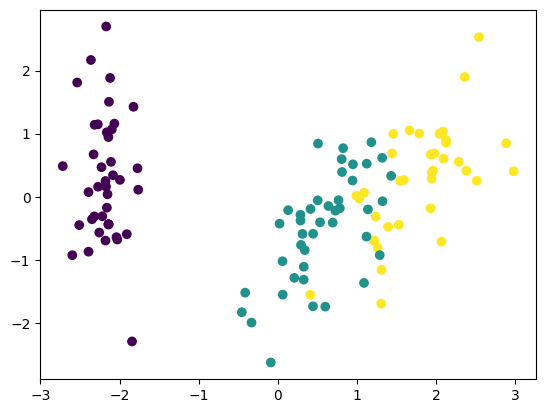

In [24]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train)
plt.show()

In [38]:
# 분류
X_test = ss.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

LogisticRegression()

In [40]:
# 예측

X_test_pca = pca.transform(X_test)
X_test_pca

y_pred = lr.predict(X_test_pca)
y_pred

array([2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0,
       2, 0, 2, 1, 1, 0, 1, 2])

In [41]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[9, 0, 0],
       [0, 8, 0],
       [0, 4, 9]], dtype=int64)